In [1]:
'''
线性回归
'''
import torch
from matplotlib import pyplot as plt
import numpy as np
import random

In [2]:
'''
构造数据集
'''

# 两个特征
FEATURE_NUM = 2
# 一百个样本
TRAIN_NUM = 100
# 设定的真实权重和偏移
real_w = [2, -3.4]
real_b = 4.2
# 生成数据
train_x = torch.randn(TRAIN_NUM, FEATURE_NUM, dtype=torch.float32)
train_y = real_w[0] * train_x[:, 0] + real_w[1] * train_x[:, 1] + real_b
# 制造噪声
train_y += torch.tensor(np.random.normal(0, 0.01, size=train_y.size()), dtype=torch.float32)

print(train_x[:5])
print(train_y[:5])

tensor([[-8.3227e-01, -3.6894e-01],
        [ 1.0814e+00,  1.2947e+00],
        [-3.8174e-01,  4.9282e-02],
        [ 1.2212e+00,  9.6377e-04],
        [ 1.8065e+00,  1.2140e+00]])
tensor([3.7914, 1.9502, 3.2721, 6.6492, 3.6993])


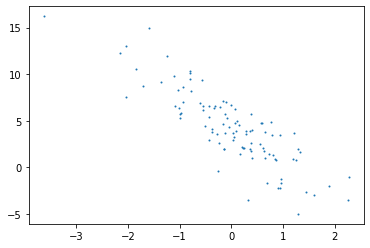

In [3]:
plt.scatter(train_x[:, 1].numpy(), train_y.numpy(), 1)

In [4]:
# 小批量读取数据
def train_data_batch(batch_size, train_x, train_y):
    total_num = len(train_x)
    # 下标组成的数组
    indices = list(range(total_num))
    # 将所有元素随机排序
    random.shuffle(indices)
    # 按 batch_size 逐批取数据
    for i in range(0, total_num, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, total_num)])
        yield train_x.index_select(0, j), train_y.index_select(0, j)

# 按 10 为批读取数据
for test_batch_x, test_batch_y in train_data_batch(10, train_x, train_y):
    print(test_batch_x, '\n', test_batch_y)
    break

tensor([[ 0.6463, -0.7757],
        [-2.3879,  1.2986],
        [ 1.2309,  2.2686],
        [-1.7683, -2.0354],
        [-1.1724, -0.2296],
        [-3.2957,  0.3202],
        [ 0.0164,  0.0986],
        [-0.1826,  0.8560],
        [-0.8917,  0.4101],
        [ 0.3591,  1.1876]]) 
 tensor([ 8.1517, -5.0063, -1.0535,  7.5947,  2.6472, -3.4743,  3.8955,  0.9043,
         1.0455,  0.8814])


In [15]:
# 初始化权重
w = torch.tensor(np.random.normal(0, 0.01, (FEATURE_NUM, 1)), dtype=torch.float32, requires_grad=True)
b = torch.zeros(1, dtype=torch.float32, requires_grad=True)
print(w, '\n', b)

tensor([[-0.0103],
        [ 0.0122]], requires_grad=True) 
 tensor([0.], requires_grad=True)


In [16]:
# 定义模型
def linear_model(X, w, b):
    return torch.mm(X, w) + b

In [17]:
# 定义平方损失函数
def square_loss(y, real_y):
    # y, real_y 可能是一个向量而非标量
    return (y - real_y.view(y.size())) ** 2 / 2

In [18]:
# 小批量随机梯度下降
def sgd(params, learning_rate, batch_size):
    for param in params:
        # 对 data 进行修改可以更改数据而又不会被记录, 不会影响到后续的梯度计算
        param.data -= learning_rate * param.grad / batch_size

In [21]:
# 学习率
LEARNING_RATE = 0.03
# 迭代次数
EPOCH_NUM = 5
# 批大小
BATCH_SIZE = 10

for epoch in range(EPOCH_NUM):
    for X, y in train_data_batch(BATCH_SIZE, train_x, train_y):
        # 一批中全部数据 loss 的和
        loss = square_loss(linear_model(X, w, b), y).sum()
        # 对 w 和 b 求梯度
        loss.backward()
        sgd([w, b], LEARNING_RATE, BATCH_SIZE)
        # 计算一次后要记得清零梯度, 否则梯度将会累加
        w.grad.data.zero_()
        b.grad.data.zero_()
    # 一次迭代中各批次 loss 的列表
    epoch_loss = square_loss(linear_model(train_x, w, b), train_y)
    print('epoch %d, loss %f' % (epoch + 1, epoch_loss.mean().item()))

epoch 1, loss 1.401946
epoch 2, loss 0.754076
epoch 3, loss 0.406344
epoch 4, loss 0.219116
epoch 5, loss 0.118279


In [22]:
# 查看结果是否与真实值接近
print(w.data.numpy(), real_w)
print(b.data.numpy(), real_b)

[[ 1.9035579]
 [-3.0884807]] [2, -3.4]
[3.8408413] 4.2
